In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [3]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Embedding

model = Sequential()
model.add(Embedding(10000 , 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential()
model.add(Embedding(10000 , 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [7]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000
max_len = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)


In [11]:
input_train = sequence.pad_sequences(input_train , maxlen = max_len)
input_test = sequence.pad_sequences(input_test , maxlen = max_len)
input_train.shape

(25000, 500)

In [16]:
from keras.models import Sequential
from keras.layers import Dense , Embedding , SimpleRNN
model = Sequential()
model.add(Embedding(max_features , 32))
model.add(SimpleRNN(32))
model.add(Dense(1 , activation = "sigmoid"))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 54s 3ms/step - loss: 0.5981 - acc: 0.6701 - val_loss: 0.4694 - val_acc: 0.7984
Epoch 2/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.3640 - acc: 0.8521 - val_loss: 0.5458 - val_acc: 0.7838
Epoch 3/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.2759 - acc: 0.8935 - val_loss: 0.3885 - val_acc: 0.8388
Epoch 4/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.2027 - acc: 0.9243 - val_loss: 0.3569 - val_acc: 0.8532
Epoch 5/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.1376 - acc: 0.9527 - val_loss: 0.4327 - val_acc: 0.8464
Epoch 6/10
20000/20000 [==============================] - 60s 3ms/step - loss: 0.0981 - acc: 0.9674 - val_loss: 0.4119 - val_acc: 0.8536
Epoch 7/10
20000/20000 [==============================] - 74s 4ms/step - loss: 0.0555 - acc: 0.9816 - val_loss: 0.4816 - val_acc:

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [18]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 135s 7ms/step - loss: 0.5040 - acc: 0.7609 - val_loss: 0.3814 - val_acc: 0.8400
Epoch 2/10
20000/20000 [==============================] - 135s 7ms/step - loss: 0.2903 - acc: 0.8857 - val_loss: 0.3783 - val_acc: 0.8358
Epoch 3/10
20000/20000 [==============================] - 209s 10ms/step - loss: 0.2315 - acc: 0.9126 - val_loss: 0.4926 - val_acc: 0.8474
Epoch 4/10
20000/20000 [==============================] - 215s 11ms/step - loss: 0.1989 - acc: 0.9266 - val_loss: 0.3853 - val_acc: 0.8656
Epoch 5/10
20000/20000 [==============================] - 155s 8ms/step - loss: 0.1698 - acc: 0.9394 - val_loss: 0.3873 - val_acc: 0.8622
Epoch 6/10
20000/20000 [==============================] - 178s 9ms/step - loss: 0.1595 - acc: 0.9414 - val_loss: 0.3190 - val_acc: 0.8718
Epoch 7/10
20000/20000 [==============================] - 218s 11ms/step - loss: 0.1390 - acc: 0.9513 - val_loss: 0.3847 

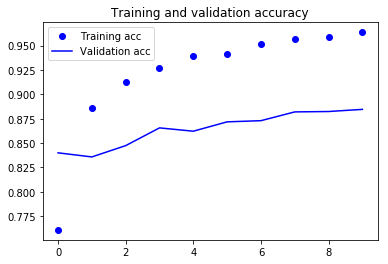

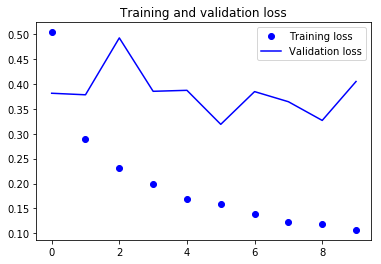

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()